#### Install Relevant Libraries

In [ ]:
!pip install nltk gensim wordcloud matplotlib
!pip install statsmodels
!pip install seaborn

#### Import relevant packages

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [13]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# Read data
df = pd.read_csv("/content/CLT_Res_Reviews.csv", encoding='ISO-8859-1')
df.head()

,rating,text,name,review_count,is_open
0,3,No way 5 star experience. Y'all are nuts.\r\n\...,Lumiere French Kitchen,106,1
1,5,VBGB is a fantastic beer garden located at NC ...,VBGB Beer Hall and Garden,291,1
2,5,A great restaurant for authentic Colombian foo...,Los Paisas,94,1
3,2,I thought Yama was overpriced and below averag...,Yama Asian Fusion,149,1
4,4,"Not sure why the bad reviews, went there had a...",Comida,98,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14098 entries, 0 to 14097
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rating        14098 non-null  int64 
 1   text          14098 non-null  object
 2   name          14098 non-null  object
 3   review_count  14098 non-null  int64 
 4   is_open       14098 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 550.8+ KB


Run preprocessing and generate the WordCloud on a food plate shape.

[('shelling', 0.6574966907501221), ('consistently', 0.6501210331916809), ('prices', 0.6369941234588623), ('however', 0.633988082408905), ('fast', 0.6281741261482239), ('value', 0.6248762607574463), ('inconsistencies', 0.6231691837310791), ('fluctuates', 0.6111611127853394), ('service', 0.6077854633331299), ('dedication', 0.6063412427902222)]


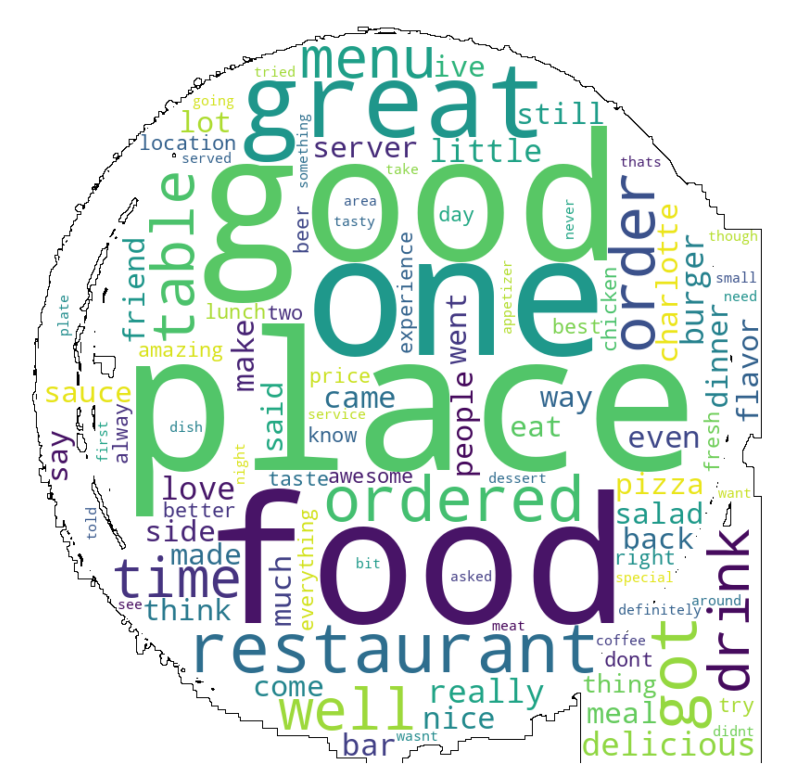

In [19]:
# Required Libraries
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

# Preprocessing function to clean the text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove non-alphabetic characters and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return filtered_tokens

# Apply the preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Train a Word2Vec model on the preprocessed text
# List of tokenized reviews (Word2Vec expects a list of lists)
sentences = df['cleaned_text'].tolist()

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Check similar words to a sample word (e.g., "food")
print(model.wv.most_similar("food"))

# Generate WordCloud for visualization
# Join all words from the cleaned_text column
all_words = ' '.join([' '.join(text) for text in df['cleaned_text']])

# Load the food plate-shaped mask image
food_plate_mask = np.array(Image.open("/content/food_plate_image.png"))

# Create the WordCloud with the food plate mask
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, mask=food_plate_mask, contour_width=1, contour_color='black').generate(all_words)

# Plot the WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()
